In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
x = np.array([413680, 285640, 181502])
y = np.array([57, 38, 55])
m1 = .00001
m2 = .0000000001
b = 40

In [92]:
y_pred = m1*x + m2*x**2 + b
x, y, y_pred

(array([413680, 285640, 181502]),
 array([57, 38, 55]),
 array([61.24991424, 51.01542096, 45.1093176 ]))

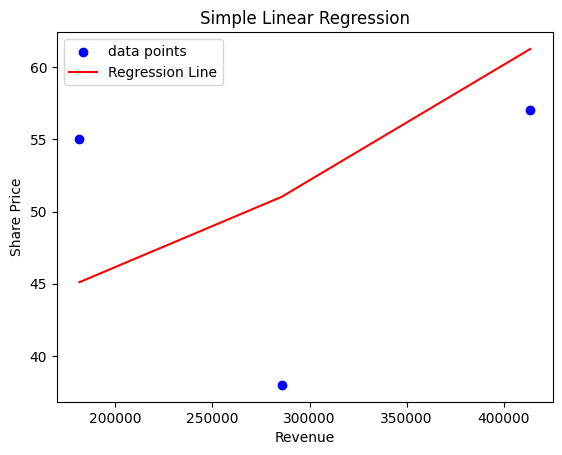

In [93]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Revenue')
plt.ylabel('Share Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [95]:
# Set parameters
N = 10  # Number of assets (can be varied as per your need)
K = 1   # Number of factors
risk_free_rate_mean = 0.02  # Annual average of risk-free rate
risk_free_rate_std = 0.02   # Standard deviation of risk-free rate
factor_return_mean = 0.08   # Annual average of factor return
factor_return_std = 0.16    # Standard deviation of factor return
alpha = 0                   # Mispricing
B = np.linspace(0.5, 1.5, N-K)  # Factor loadings
T = 24000                   # Number of months

In [97]:
# Generate risk-free rate
risk_free_rate = np.random.normal(risk_free_rate_mean, risk_free_rate_std, T)

# Generate factor returns
factor_returns = np.random.normal(factor_return_mean, factor_return_std, T)

# Generate noise for each asset
noise_variances = np.random.uniform(0.10, 0.30, N-K)
noise = np.random.normal(0, np.sqrt(noise_variances), (T, N-K))

# Calculate asset returns
asset_returns = alpha + np.outer(factor_returns, B) + noise
asset_returns_df = pd.DataFrame(asset_returns, columns=[f'Asset_{i+1}' for i in range(N-K)])

In [98]:
asset_returns_df

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6,Asset_7,Asset_8,Asset_9
0,-0.137096,-0.118004,0.161409,0.974954,-0.171692,0.172913,-0.571466,-0.270834,0.784089
1,0.143607,-0.321718,0.292284,-0.767040,-0.407960,0.216846,0.194893,1.012611,0.302422
2,-0.722469,0.199958,0.643933,0.140939,0.899569,-0.369630,-0.217860,0.115601,-0.030610
3,-0.152347,0.470312,0.460606,0.570360,0.169343,-0.255642,-0.438258,0.319037,0.339481
4,0.398567,-0.195414,0.656462,0.125131,0.433087,0.403052,0.134223,-0.539093,0.252038
...,...,...,...,...,...,...,...,...,...
23995,-0.205451,-0.275809,0.529500,0.307629,0.333053,0.137472,0.072073,0.318582,0.076421
23996,0.358038,-0.182135,0.151577,-0.030900,-0.073258,0.290580,0.484541,0.454278,0.298549
23997,-0.122417,0.199109,0.224889,0.318161,0.057035,-0.367171,0.575339,-0.115136,-0.133926
23998,0.461583,0.204737,0.224441,-0.061269,-0.900181,-0.424071,-0.389360,-0.936665,-0.431934


In [99]:
returns = asset_returns_df.pct_change().dropna()

In [100]:
N = len(returns.columns)  # Number of assets
weights = np.full(N, 1/N)  # Equal weights to each asset

In [101]:
portfolio_returns = returns.dot(weights)

In [109]:
cumulative_returns = (1 + portfolio_returns).cumprod()
individual_cumulative_returns = (1 + returns.pct_change()).cumprod()


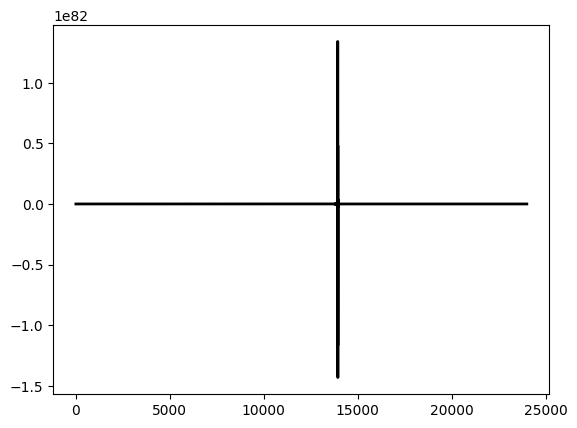

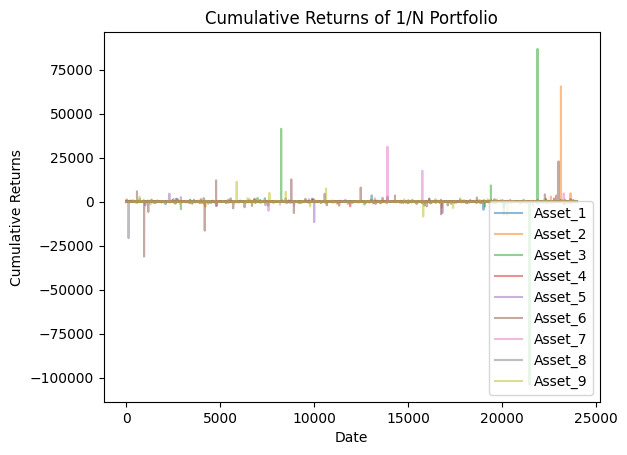

In [110]:
cumulative_returns.plot(color='black', linewidth=2, label='1/N Portfolio')
individual_cumulative_returns.plot(alpha=0.5)
plt.title('Cumulative Returns of 1/N Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


In [118]:
average_portfolio_return = portfolio_returns.mean()
portfolio_std_dev = portfolio_returns.std()

sharpe_ratios = (average_portfolio_return - risk_free_rate) / portfolio_std_dev
sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)

In [130]:
risk_aversion_coefficient = 3  # Example value; varies based on investor
certainty_equivalent_return = average_portfolio_return - 0.5 * risk_aversion_coefficient * (portfolio_std_dev ** 2)

In [131]:
print('Sharpe Ratio: ', sharpe_ratio)
print('Certainty Equiv Return: ', certainty_equivalent_return)

Sharpe Ratio:  -0.00229557932545008
Certainty Equiv Return:  -30769.644754897025
